In [2]:
def get_salary(salary):
    salary = salary.lower().replace('k', '').replace('以上', '')
    salary_range = salary.split('-')   

    if len(salary_range) == 1:
        return int(salary_range[0]), int(salary_range[0]), int(salary_range[0])
    
    avg_salary = (int(salary_range[0]) + int(salary_range[1])) / 2.0    
    return int(salary_range[0]), avg_salary, int(salary_range[1])


In [3]:
import pandas as pd
import re

file_name = 'lagou_copy1_copy1.csv'
jobs_data = pd.read_csv(file_name)

jobs_data[['lower_salary', 'avg_salary', 'upper_salary']] = jobs_data.apply(lambda x: get_salary(x['salary']),
                                                                            axis=1,
                                                                            result_type="expand")

jobs_data.head(10)

id       positionName district stationname jobNature  \
0  48028         游戏场景/原画设计师      朝阳区         东湖渠        全职   
1  48029          python工程师      大兴区        荣昌东街        全职   
2  48030              测试工程师      西城区         北海北        全职   
3  48031  web前端开发工程师(仅限应届生)      海淀区       军事博物馆        全职   
4  48032      高级Java后端开发工程师      海淀区         中关村        全职   
5  48033       UI设计师(JC2J1)      朝阳区          国贸        全职   
6  48034       金蝶EAS系统运维工程师      海淀区         知春路        全职   
7  48035        高级Java开发工程师      朝阳区         望京东        全职   
8  48036                php      朝阳区        东风北桥        全职   
9  48037       搜狗输入法-交互设计专家      海淀区      北京大学东门        全职   

                     companyLabelList industryField   salary companySize  \
0    ['技能培训', '节日礼物', '专项奖金', '带薪年假']      移动互联网,游戏  10k-15k    150-500人   
1    ['绩效奖金', '专项奖金', '午餐补助', '定期体检']         移动互联网  14k-28k      15-50人   
2    ['移动医疗', '职位晋升', '管理规范', '福利全面']   医疗丨健康,移动互联网   8k-15k     50-150人   
3  ['带薪年假', '团队nice', '扁平管理', '通讯津贴']      移动互联网,金融   8k-12k      15-50人   
4                                  []    医疗丨健康,数据服务  15k-20k    150-500人   
5    ['股票期权', '五险一金', '带薪年假', '节日礼物']      移动互联网,社交  12k-18k    150-500人   
6    ['带薪年假', '专项奖金', '六险一金', '餐饮补贴']      教育,移动互联网  12k-15k     2000人以上   
7     ['技能培训', '绩效奖金', '岗位晋升', '领导好']          消费生活  30k-60k     2000人以上   
8    ['绩效奖金', '五险一金', '带薪年假', '免费班车']          房产家居  10k-20k     2000人以上   
9    ['岗位晋升', '扁平管理', '管理规范', '精英团队']            工具  25k-45k     2000人以上   

                skillLables  ... city keyword  firstType secondType thirdType  \
0              ['原画', '场景']  ...   北京     原画师        设计类   原画|美术|特效      游戏场景   
1  ['后端', 'docker', '服务器端']  ...   北京  python  开发|测试|运维类       后端开发    Python   
2                    ['测试']  ...   北京      测试  开发|测试|运维类         测试     测试工程师   
3                  ['前端开发']  ...   北京    前端开发  开发|测试|运维类       前端开发     WEB前端   
4                        []  ...   北京    后端开发  开发|测试|运维类       后端开发      Java   
5                    ['UI']  ...   北京    UI设计        设计类         视觉        UI   
6                        []  ...   北京      运维  开发|测试|运维类         运维   运维开发工程师   
7                        []  ...   北京    Java  开发|测试|运维类       后端开发      Java   
8           ['后端', 'MySQL']  ...   北京     php  开发|测试|运维类       后端开发       PHP   
9              ['交互', '设计']  ...   北京    交互设计        设计类         交互     交互设计师   

    latitude   longitude lower_salary avg_salary upper_salary  
0  40.011925  116.471587         10.0       12.5         15.0  
1  39.791831  116.512863         14.0       21.0         28.0  
2  39.941432  116.392581          8.0       11.5         15.0  
3  39.909371  116.311868          8.0       10.0         12.0  
4  39.979487  116.306446         15.0       17.5         20.0  
5       39.9    116.4724         12.0       15.0         18.0  
6  39.987066   116.34122         12.0       13.5         15.0  
7  40.008142  116.486622         30.0       45.0         60.0  
8  39.953904  116.499553         10.0       15.0         20.0  
9  39.993798  116.332289         25.0       35.0         45.0  

[10 rows x 28 columns]

In [4]:
jobs_data.shape

(435470, 28)

In [5]:
n_lagou = jobs_data.drop_duplicates(subset='url', keep="first")
n_lagou.shape

(94879, 28)

In [13]:
n_lagou['type']

0         设计线
1         技术线
2         技术线
3         技术线
4         技术线
         ... 
434948    NaN
435180    NaN
435356    NaN
435391    NaN
435461    NaN
Name: type, Length: 94879, dtype: object

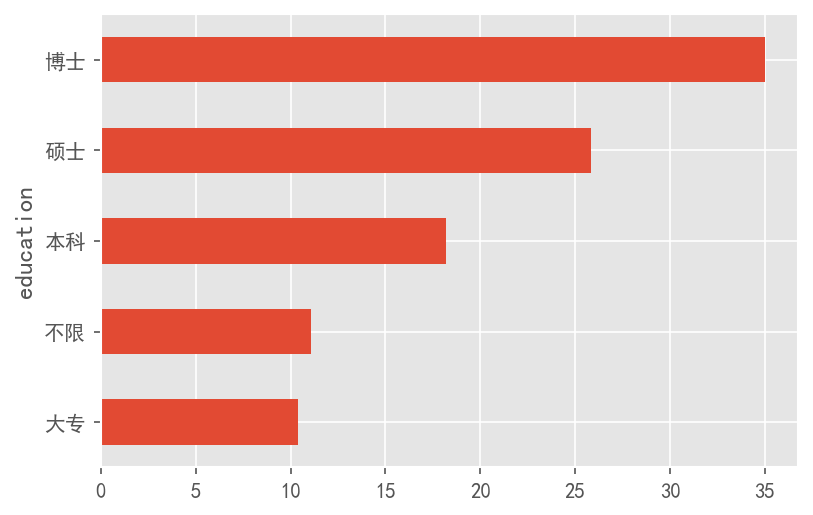

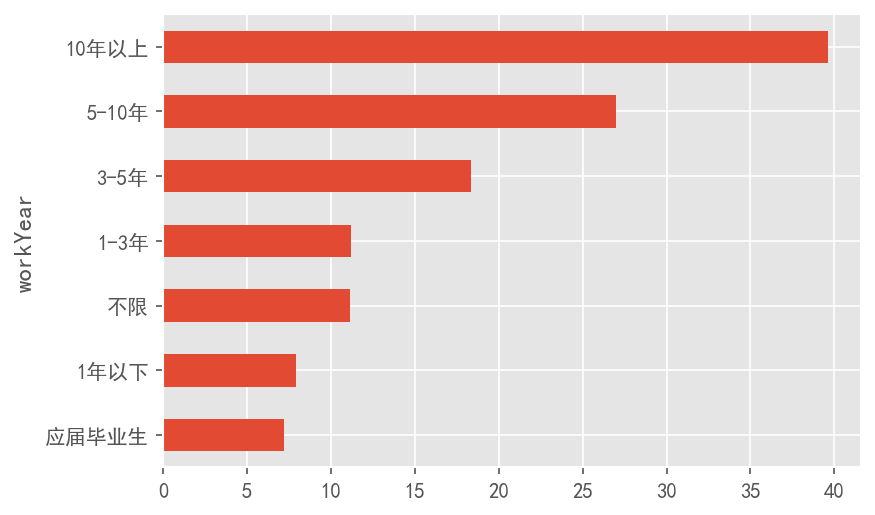

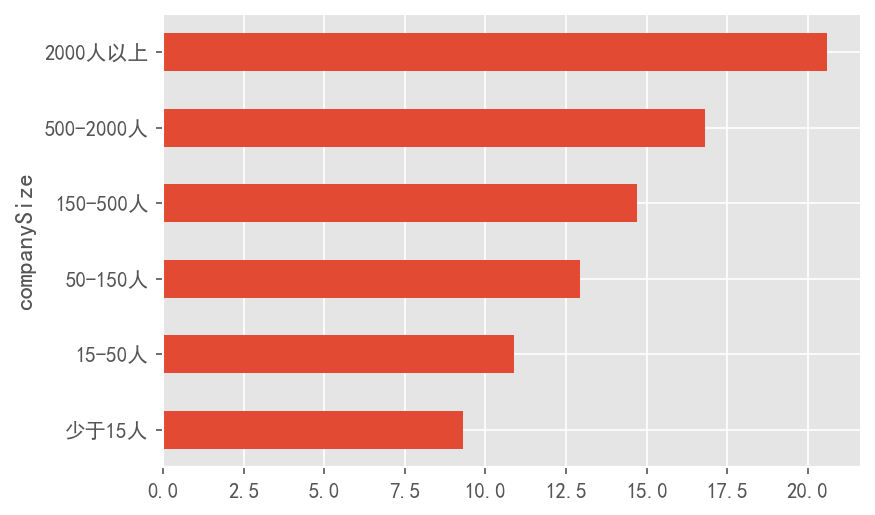

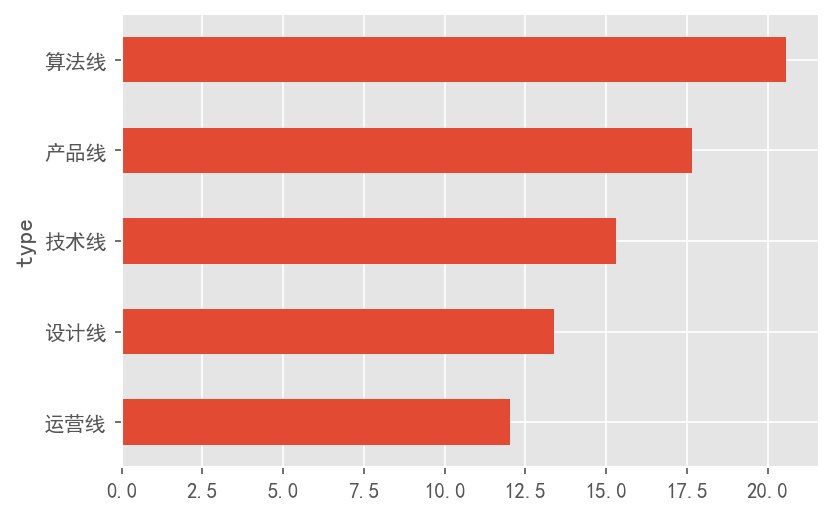

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl

plt.style.use('ggplot')
mpl.rcParams['font.sans-serif'] = ['SimHei']  
figsize = (10, 10)
plt.rc('figure', figsize=figsize)  
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

# 学历与工资的可视化
fig = plt.figure(dpi=150)
n_lagou.groupby(['education']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 工作年限与工资的可视化
fig = plt.figure(dpi=150)
n_lagou.groupby(['workYear']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 公司规模与工资
fig = plt.figure(dpi=150)
n_lagou.groupby(['companySize']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 岗位大类与工资
fig = plt.figure(dpi=150)
n_lagou.groupby(['type']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

In [7]:
# 去除兼职和实现的数据
jobNature = ['兼职', '实习']
for i in jobNature:
    jobs_data = n_lagou.drop(n_lagou[n_lagou['jobNature'] == i].index)

In [8]:
n_lagou.shape

(94879, 28)

In [9]:
n_lagou.describe()

id  lower_salary    avg_salary  upper_salary
count   94879.000000  94879.000000  94879.000000  94879.000000
mean   203070.027372     11.220597     15.208476     19.196355
std    111980.426160      8.227381     11.025719     14.030948
min     48028.000000      1.000000      1.000000      1.000000
25%    109428.000000      6.000000      7.500000     10.000000
50%    181431.000000     10.000000     12.500000     15.000000
75%    281710.500000     15.000000     20.000000     25.000000
max    483489.000000    490.000000    495.000000    500.000000

In [16]:
# 大类与薪资
n_lagou.groupby(['firstType']).mean()['avg_salary'].sort_values(ascending=False)

firstType
人事/行政/财务/法务     40.000000
市场/品牌/公关        40.000000
质量与流程IT族        35.000000
互联网/通信及硬件       32.000000
视觉/交互/设计        30.000000
开发/测试/运维类       28.055556
产品/需求/项目类       24.857143
开发|测试|运维类       20.066489
产品|需求|项目类       19.461714
金融投资            15.666667
IT/互联网/通信       13.937500
设计类             13.660345
金融类             13.565844
商业服务|专业服务       13.236715
市场|商务类          12.693717
地产/建筑/物业        12.500000
运营/编辑/客服        12.166667
生产|加工|制造        11.987319
销售类             11.801486
化工|生物|制药|医护     11.322222
运营|编辑|客服类       11.086934
综合职能|高级管理       10.365390
技术              10.333333
教育|培训           10.145257
贸易|批发|零售|租赁业     9.956250
市场               9.875000
交通|运输|物流|仓储      9.780405
文娱|传媒|艺术|体育      9.571656
房地产|建筑|物业        9.417266
广告/传媒/设计         9.000000
能源矿产|农林牧渔        8.718750
财务/审计/税务         8.000000
公务员|其他           7.451327
服务业              7.041667
市场与销售            6.500000
设计               6.375000
市场/商务/销售类        6.000000
——               3.750000
综合

In [82]:
skill_lables = []
for i in n_lagou['skillLables']:
    skill_lables.extend(eval(i))
skill_lables

['原画',
 '场景',
 '后端',
 'docker',
 '服务器端',
 '测试',
 '前端开发',
 'UI',
 '后端',
 'MySQL',
 '交互',
 '设计',
 '商业产品',
 '数据',
 '测试',
 '功能测试',
 '性能测试',
 '自动化',
 '动画',
 '原画',
 '角色',
 '场景',
 '后端',
 '服务器端',
 'Java',
 '分布式',
 'Python',
 '实施',
 '软件开发',
 '后端',
 'UI',
 'HTML5',
 '前端开发',
 'Javascript',
 '产品设计',
 '教育',
 '交互',
 '接口测试',
 '角色',
 '原画',
 '2D',
 '欧美风',
 'Python',
 '运维开发',
 '自动化运维',
 'Python',
 '配置管理',
 'Java',
 'UI',
 '前端开发',
 'HTML5',
 'Web前端',
 'Java',
 '社交/SNS',
 'UE',
 '交互',
 '测试',
 '移动端',
 'PHP',
 'UI',
 '运维',
 'Docker',
 '深度学习平台运维',
 'Java',
 'Javascript',
 '前端开发',
 'HTML5',
 'Web前端',
 'UI',
 '产品设计',
 '需求分析',
 '用户研究',
 'Java',
 '解决方案',
 '服务器端',
 'SOA',
 'UE',
 '交互',
 'Python',
 'docker',
 'Linux/Unix',
 '电商',
 '社交电商',
 '产品策划',
 '需求分析',
 '功能测试',
 '测试',
 'PHP',
 '前端开发',
 'CSS',
 'Javascript',
 'HTML5',
 'C',
 'Java',
 '产品经理',
 'UI',
 '交互',
 '用户体验',
 'GO',
 'C++',
 'PHP',
 'Python',
 '原画',
 '场景',
 '角色',
 '产品设计',
 '产品策划',
 '需求分析',
 '项目管理',
 'Web测试',
 'Jmeter',
 '性能测试',
 'Web前端',
 '系统安全运维',
 '运维开发'

In [83]:
wordList= []
# 用于统计词频
wordCount= {}

# 遍历数组进行词频统计，这里使用wordCount 对象，出发点是对象下标方便查询
for item in skill_lables:
    if item not in wordCount:
        wordCount[item] = 1
    else:
        wordCount[item] += 1
wordCount

{'原画': 874,
 '场景': 661,
 '后端': 3747,
 'docker': 237,
 '服务器端': 1052,
 '测试': 1379,
 '前端开发': 2541,
 'UI': 1270,
 'MySQL': 1414,
 '交互': 640,
 '设计': 178,
 '商业产品': 169,
 '数据': 146,
 '功能测试': 562,
 '性能测试': 569,
 '自动化': 675,
 '动画': 673,
 '角色': 521,
 'Java': 2931,
 '分布式': 959,
 'Python': 1076,
 '实施': 512,
 '软件开发': 503,
 'HTML5': 1132,
 'Javascript': 1639,
 '产品设计': 1919,
 '教育': 69,
 '接口测试': 108,
 '2D': 637,
 '欧美风': 73,
 '运维开发': 102,
 '自动化运维': 58,
 '配置管理': 101,
 'Web前端': 1124,
 '社交/SNS': 70,
 'UE': 240,
 '移动端': 2165,
 'PHP': 783,
 '运维': 1429,
 'Docker': 104,
 '深度学习平台运维': 4,
 '需求分析': 1560,
 '用户研究': 965,
 '解决方案': 726,
 'SOA': 31,
 'Linux/Unix': 1173,
 '电商': 111,
 '社交电商': 27,
 '产品策划': 982,
 'CSS': 692,
 'C': 747,
 '产品经理': 164,
 '用户体验': 301,
 'GO': 486,
 'C++': 2053,
 '项目管理': 1581,
 'Web测试': 368,
 'Jmeter': 117,
 '系统安全运维': 34,
 'J2EE': 409,
 '视觉': 1425,
 '网页': 266,
 '品牌': 415,
 '移动交互': 139,
 '网页交互': 82,
 '测试开发': 512,
 '企业软件': 398,
 '系统集成': 148,
 'HTML': 540,
 '数据库': 757,
 '数据分析': 2471,
 'Q版': 147,
 '儿

In [84]:
sorted(wordCount.items(), key=lambda i:i[1], reverse=True)

[('销售', 6064),
 ('后端', 3747),
 ('运营', 3690),
 ('Java', 2931),
 ('前端开发', 2541),
 ('数据分析', 2471),
 ('客户代表', 2189),
 ('移动端', 2165),
 ('市场', 2124),
 ('C++', 2053),
 ('产品设计', 1919),
 ('电话销售', 1824),
 ('大客户销售', 1809),
 ('营销', 1674),
 ('内容运营', 1643),
 ('Javascript', 1639),
 ('新媒体运营', 1591),
 ('项目管理', 1581),
 ('需求分析', 1560),
 ('Android', 1551),
 ('用户运营', 1480),
 ('运维', 1429),
 ('视觉', 1425),
 ('招聘', 1417),
 ('客服', 1415),
 ('MySQL', 1414),
 ('算法', 1408),
 ('测试', 1379),
 ('活动策划', 1334),
 ('电商运营', 1302),
 ('文案', 1298),
 ('销售顾问', 1296),
 ('UI', 1270),
 ('IOS', 1264),
 ('Linux/Unix', 1173),
 ('产品运营', 1159),
 ('人工智能', 1152),
 ('HTML5', 1132),
 ('Web前端', 1124),
 ('Python', 1076),
 ('3D', 1071),
 ('人事', 1068),
 ('行政', 1054),
 ('服务器端', 1052),
 ('市场拓展', 1052),
 ('BD', 1039),
 ('架构师', 1036),
 ('渠道', 1035),
 ('HR', 1025),
 ('区域销售', 1010),
 ('人力资源', 1010),
 ('售前', 1002),
 ('产品策划', 982),
 ('用户研究', 965),
 ('游戏策划', 961),
 ('分布式', 959),
 ('Linux', 956),
 ('销售代表', 903),
 ('推广', 900),
 ('策划', 896),
 ('机器学习', 890)

In [17]:
# 每个大类下的岗位数量
jobs_data['firstType'].value_counts()

开发|测试|运维类       31328
运营|编辑|客服类       14941
销售类             11445
设计类              8208
产品|需求|项目类        7744
市场|商务类           6856
综合职能|高级管理        6165
文娱|传媒|艺术|体育      1510
金融类              1201
生产|加工|制造          544
教育|培训             494
房地产|建筑|物业         271
服务业               248
商业服务|专业服务         200
公务员|其他            179
交通|运输|物流|仓储       146
化工|生物|制药|医护        86
贸易|批发|零售|租赁业       78
IT/互联网/通信          32
能源矿产|农林牧渔          15
开发/测试/运维类           9
市场                  8
产品/需求/项目类           5
设计                  3
技术                  3
金融投资                3
质量与流程IT族            2
互联网/通信及硬件           2
运营/编辑/客服            2
人事/行政/财务/法务         1
市场/品牌/公关            1
财务/审计/税务            1
视觉/交互/设计            1
市场与销售               1
广告/传媒/设计            1
市场/商务/销售类           1
地产/建筑/物业            1
Name: firstType, dtype: int64

In [19]:
jobs_data['thirdType'].value_counts()

Java        3604
WEB前端       2840
产品经理        2515
销售专员|助理     1910
C|C++       1764
            ... 
通信标准化工程师       1
物流总监           1
多媒体/动画设计       1
房地产招商          1
物业机电工程师        1
Name: thirdType, Length: 854, dtype: int64

In [20]:
jobs_data['secondType'].value_counts()

后端开发         9756
运营           9743
销售           9621
移动前端开发       4431
产品经理         4185
             ... 
人事              1
IT运维/技术支持       1
软件研发            1
运维安全            1
公关              1
Name: secondType, Length: 118, dtype: int64

In [21]:
# 城市与薪资
n_lagou.groupby(['city']).mean()['avg_salary'].sort_values(ascending=False)[0:20]

city
湛江     49.785714
北京     20.788763
上海     18.707898
邢台     18.500000
深圳     17.657541
杭州     16.986051
佛山     13.696181
厦门     13.500000
广州     12.869911
东莞     12.721757
南京     12.456126
苏州     12.303941
珠海     12.253165
西宁     12.000000
马鞍山    12.000000
成都     11.570676
海口     11.500000
大连     11.346154
福州     11.333333
镇江     11.250000
Name: avg_salary, dtype: float64

In [22]:
n_lagou.groupby(['city']).count()['avg_salary'].sort_values(ascending=False)[0:20]

TypeError: sort_values() missing 1 required positional argument: 'by'

In [24]:
n_lagou['city'].value_counts().sort_values(ascending=False)[0:20]

北京    17433
上海    13586
深圳     9661
杭州     9642
成都     8539
广州     7099
武汉     5077
南京     3624
西安     3219
长沙     2640
苏州     2461
重庆     2252
郑州     2201
天津     1858
青岛     1241
沈阳      985
昆明      807
无锡      802
宁波      774
佛山      288
Name: city, dtype: int64

In [25]:
n_lagou['detail']

0         岗位职责：1、主要负责场景地图规划和制作，游戏场景布局气氛等；2、有责任心，听从上级领导指挥...
1         工作职责：1、负责数据、应用平台的前后端开发和性能调优；2、负责应用平台数据处理程序，重点标...
2         岗位职责：1.负责app/微信公众号/小程序等产品功能测试、兼容性测试、压力测试、自动化测试...
3         职位诱惑：节日福利,团建活动,年底双薪,年终奖职位描述：【岗位职责】1. 参与多种平台的产品...
4         岗位设置目的支持医疗大数据平台的后端开发工作 ：工作职责：一、负责核心产品的设计与研发工作 ...
                                ...                        
434948    想要年收入8万以上吗？想要增加你的沟通与外交能力吗？想要锻炼你的口才能力吗？想要成为一名资深...
435180                        能独立完成项目设计，适应快节奏工作环境，能回效果图优先考虑
435356    .年龄在40岁以下，有工厂内工作经验，熟悉生产，质量，相关流程。2.熟悉16949、ISO9...
435391       工作职能：主要负责全国活动，帮助经销商以活动的形式出货，需适应长期出差（出差补贴180/天）
435461    主播任职要求：1、性格外向，善于交流！2、每天直播6个小时，每月直播天数25天，时间弹性自由...
Name: detail, Length: 94879, dtype: object

In [58]:
import jieba
def fenci(sentences):
    lastsentences = cutsentences(sentences)
    # 词语数组
    wordList= []
    # 用于统计词频
    wordCount= {}

    # 从分词后的源文件中读取数据
#     sourceData = "/ ".join(seg_list)
#     print(sourceData)
    # 利用空格分割成数组
    wordsList = lastsentences.split('/ ')[:-1]
    print(wordList)
    # 遍历数组进行词频统计，这里使用wordCount 对象，出发点是对象下标方便查询
    for item in wordsList:
      if item not in wordCount:
        wordCount[item] = 1
      else:
        wordCount[item] += 1
    print(wordCount)
    return wordCount
fenci('主要负责场景地图规划和制作，游戏场景布局气氛等；2、有责任心，听从上级领导')


原句子为：主要负责场景地图规划和制作，游戏场景布局气氛等；2、有责任心，听从上级领导

分词后：主要/ 负责/ 场景/ 地图/ 规划/ 和/ 制作/ ，/ 游戏/ 场景/ 布局/ 气氛/ 等/ ；/ 2/ 、/ 有/ 责任心/ ，/ 听从/ 上级领导

去除停用词后：负责/ 场景/ 地图/ 规划/ 制作/ 游戏/ 场景/ 布局/ 气氛/ 2/ 责任心/ 听从/ 上级领导/ 
[]
{'负责': 1, '场景': 2, '地图': 1, '规划': 1, '制作': 1, '游戏': 1, '布局': 1, '气氛': 1, '2': 1, '责任心': 1, '听从': 1, '上级领导': 1}


{'负责': 1,
 '场景': 2,
 '地图': 1,
 '规划': 1,
 '制作': 1,
 '游戏': 1,
 '布局': 1,
 '气氛': 1,
 '2': 1,
 '责任心': 1,
 '听从': 1,
 '上级领导': 1}

In [57]:
import jieba

def stopwordslist(filepath):   # 定义函数创建停用词列表
    stopword = [line.strip() for line in open(filepath, 'r').readlines()]    #以行的形式读取停用词表，同时转换为列表
    return stopword
   
def cutsentences(sentences):     #定义函数实现分词
    print('原句子为：'+ sentences)
    cutsentence = jieba.lcut(sentences.strip())     #精确模式
    print ('\n'+'分词后：'+ "/ ".join(cutsentence)) 
    stopwords = stopwordslist(filepath)     # 这里加载停用词的路径
    lastsentences = ''
    for word in cutsentence:     #for循环遍历分词后的每个词语
        if word not in stopwords:     #判断分词后的词语是否在停用词表内
            if word != '\t':
                lastsentences += word
                lastsentences += "/ "
    print('\n'+'去除停用词后：'+ lastsentences) 
    return lastsentences

filepath= './stopword.txt'  
sentences = '万里长城是中国古代劳动人民血汗的结晶和中国古代文化的象征和中华民族的骄傲'
stopwordslist(filepath)
cutsentences(sentences)


原句子为：万里长城是中国古代劳动人民血汗的结晶和中国古代文化的象征和中华民族的骄傲

分词后：万里长城/ 是/ 中国/ 古代/ 劳动/ 人民/ 血汗/ 的/ 结晶/ 和/ 中国/ 古代/ 文化/ 的/ 象征/ 和/ 中华民族/ 的/ 骄傲

去除停用词后：万里长城/ 中国/ 古代/ 劳动/ 人民/ 血汗/ 结晶/ 中国/ 古代/ 文化/ 象征/ 中华民族/ 骄傲/ 


'万里长城/ 中国/ 古代/ 劳动/ 人民/ 血汗/ 结晶/ 中国/ 古代/ 文化/ 象征/ 中华民族/ 骄傲/ '

In [41]:
fenci('主要负责场景地图规划和制作，游戏场景布局气氛等；2、有责任心，听从上级领导')


主要-负责-场景-地图-规划-和-制作-，-游戏-场景-布局-气氛-等-；-2-、-有-责任心-，-听从-上级领导
['主要', '负责', '场景', '地图', '规划', '和', '制作', '，', '游戏', '场景', '布局', '气氛', '等', '；', '2', '、', '有', '责任心', '，', '听从', '上级领导']
['主要', '负责', '场景', '地图', '规划', '和', '制作', '，', '游戏', '场景', '布局', '气氛', '等', '；', '2', '、', '有', '责任心', '，', '听从', '上级领导'] {'主要': 1, '负责': 1, '场景': 2, '地图': 1, '规划': 1, '和': 1, '制作': 1, '，': 2, '游戏': 1, '布局': 1, '气氛': 1, '等': 1, '；': 1, '2': 1, '、': 1, '有': 1, '责任心': 1, '听从': 1, '上级领导': 1}


In [43]:
n_lagou.loc[n_lagou['firstType'] == 'Java']['detail']

0         岗位职责：1、主要负责场景地图规划和制作，游戏场景布局气氛等；2、有责任心，听从上级领导指挥...
5         1、负责公司APP的UI设计；2、了解产品需求并提出创新想法，完成系统的界面设计、原型设计；...
9         岗位职责：1. 负责手机输入法及衍生产品的交互设计，对产品的交互体验负责；2. 根据产品规划...
13        1、负责游戏内的人物，装备，NPC,坐骑，时装，宠物，Boss，怪物等形象的设定；2、负责游...
18        项目介绍：搜狗输入法集中着搜狗公司最优势的人力、技术、用户资源，这里是搜狗最成熟产品的策源地...
                                ...                        
429678    岗位职责：1．参与公司app、h5界面的UI设计工作2．负责活动专题及推荐图的视觉设计工作3...
430151                                                  NaN
430410    岗位职责：1. 负责游戏整体美术制作，包括游戏UI、icon、logo、美宣的设计制作2. ...
430472    岗位职责：1、负责视频广告制作，协助需求部门完成视频素材创意，视频广告更新，用于广告市场推广...
434895    岗位职责：1、负责游戏宣传图、banner、logo、广点通或今日头条等渠道的投放素材图的设...
Name: detail, Length: 8569, dtype: object

In [75]:
all = ''.join([str(i) for i in n_lagou['detail'] if i != np.nan])
all_dict = fenci(all)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[]
{'岗位职责': 43972, '1': 180391, '负责': 122055, '场景': 9107, '地图': 791, '规划': 14708, '制作': 17880, '游戏': 33369, '布局': 1901, '气氛': 923, '2': 182147, '责任心': 19667, '听从': 90, '上级领导': 1263, '指挥': 74, '服从安排': 147, '3': 178595, '主美': 204, '人': 9509, '策划': 24596, '进行': 55398, '设计': 80376, '风格': 7217, '沟通': 67084, '确认': 1208, '4': 132742, '对手': 144, '游': 738, '清晰': 5870, '理解': 15627, '良好': 65828, '别人': 382, '任职': 48794, '要求': 77025, '熟练': 30083, '使用': 36309, 'photoshop': 480, '相关': 92910, '流程': 22458, '软件': 25831, '各类': 10937, '具备': 52604, '色彩感': 213, '感': 966, '高品质': 574, '还原': 479, '思路': 2577, '颜色': 111, '质感': 212, '搭配': 621, '合理': 4632, '使': 1062, '美观': 140, '立体': 93, '驾驭': 327, '多种': 2789, '素材': 3416, '表现': 3519, '3D': 3742, '呈现': 891, '见解': 2152, '团队': 73618, '合作': 34820, '意识': 17750, '需要': 8816, '较强': 23344, '学习': 39027, '能力': 161720, '应聘者': 476, '请': 4151, '提供': 34124, '简历': 5114, '作品': 5934, '注明': 150, '应聘': 1214, '职位': 21095, '工作': 174764, '职责': 13076, '数据': 49010, '应用': 19110, '平台': 4053

[(' ', 393851),
 ('\xa0', 348227),
 ('2', 182147),
 ('1', 180391),
 ('3', 178595),
 ('工作', 174764),
 ('能力', 161720),
 ('经验', 147560),
 ('4', 132742),
 ('负责', 122055),
 ('产品', 104965),
 ('熟悉', 100060),
 ('5', 97907),
 ('相关', 92910),
 ('优先', 86824),
 ('公司', 86320),
 ('开发', 86177),
 ('设计', 80376),
 ('要求', 77025),
 ('团队', 73618),
 ('客户', 68806),
 ('项目', 67278),
 ('沟通', 67084),
 ('良好', 65828),
 ('以上', 64279),
 ('年', 58466),
 ('强', 56023),
 ('技术', 55470),
 ('进行', 55398),
 ('分析', 54167),
 ('需求', 52628),
 ('具备', 52604),
 ('运营', 51651),
 ('6', 51425),
 ('完成', 49240),
 ('数据', 49010),
 ('任职', 48794),
 ('管理', 46879),
 ('业务', 46648),
 ('用户', 45847),
 ('岗位职责', 43972),
 ('以上学历', 43472),
 ('优化', 41075),
 ('销售', 40977),
 ('平台', 40530),
 ('专业', 40343),
 ('行业', 39449),
 ('学习', 39027),
 ('系统', 37286),
 ('使用', 36309),
 ('了解', 35888),
 ('合作', 34820),
 ('活动', 34253),
 ('提供', 34124),
 ('游戏', 33369),
 ('熟练', 30083),
 ('维护', 29545),
 ('岗位', 29389),
 ('能够', 29294),
 ('测试', 29106),
 ('培训', 27680),
 ('问题', 27499),

In [76]:
sorted(all_dict.items(), key=lambda i:i[1], reverse=True)

[(' ', 393851),
 ('\xa0', 348227),
 ('2', 182147),
 ('1', 180391),
 ('3', 178595),
 ('工作', 174764),
 ('能力', 161720),
 ('经验', 147560),
 ('4', 132742),
 ('负责', 122055),
 ('产品', 104965),
 ('熟悉', 100060),
 ('5', 97907),
 ('相关', 92910),
 ('优先', 86824),
 ('公司', 86320),
 ('开发', 86177),
 ('设计', 80376),
 ('要求', 77025),
 ('团队', 73618),
 ('客户', 68806),
 ('项目', 67278),
 ('沟通', 67084),
 ('良好', 65828),
 ('以上', 64279),
 ('年', 58466),
 ('强', 56023),
 ('技术', 55470),
 ('进行', 55398),
 ('分析', 54167),
 ('需求', 52628),
 ('具备', 52604),
 ('运营', 51651),
 ('6', 51425),
 ('完成', 49240),
 ('数据', 49010),
 ('任职', 48794),
 ('管理', 46879),
 ('业务', 46648),
 ('用户', 45847),
 ('岗位职责', 43972),
 ('以上学历', 43472),
 ('优化', 41075),
 ('销售', 40977),
 ('平台', 40530),
 ('专业', 40343),
 ('行业', 39449),
 ('学习', 39027),
 ('系统', 37286),
 ('使用', 36309),
 ('了解', 35888),
 ('合作', 34820),
 ('活动', 34253),
 ('提供', 34124),
 ('游戏', 33369),
 ('熟练', 30083),
 ('维护', 29545),
 ('岗位', 29389),
 ('能够', 29294),
 ('测试', 29106),
 ('培训', 27680),
 ('问题', 27499),

In [68]:
s = ''.join([str(i) for i in n_lagou.loc[n_lagou['thirdType'] == 'Java']['detail']  if i!=np.nan])
s

"岗位设置目的支持医疗大数据平台的后端开发工作 ：工作职责：一、负责核心产品的设计与研发工作 ；二、优化后端开发方式及协作流程 ;三、制定后端开发框架四、具有项目管理经验的人优先任职资格：1、负责系统框架搭建 、关键功能模块的开发 ，对团队成员进行技术指导2、负责项目关键技术攻关3、计算机软件或信息管理相关专业必须 （3-5年） 以上Java项目开发经验4、JAVA基础扎实 ，精通J2EE编程技术 （如Hibernate 、Spring、SpringMVC 、SpringBoot、MyBatis）， 熟练掌握多线程、集合等基础框架 ， 熟悉分布式、缓存、 消息 、搜索等机制5、精通模块化架构设计 ，并有较为丰富使用经验 \xa06、熟练掌握7、精通数据库及配置8、熟悉常用设计模式9、理解 TCP/IP10、具有良好的逻辑思维能力力的能力 HTML、JavaScript、CSS，能熟练编写SQL，有分布式、高并发，HTTP协议，熟悉Linux、良好的表达和沟通能力 等Web前端开发技术脚本，并能对脚步、高负载； 、参数进行调优等工作、高可用性系统设计开发经验者优先考虑，具备良好的团队合作精神 、较强的承受压nan业务描述完美世界的新业务群（BG），涉及多端应用的大型互联网应用系统岗位职责1.\xa0参与产品设计，完成系统需求分析设计；\xa02.\xa0参与服务器端业务架构设计,\xa0模块划分和模块开发；\xa03.\xa0主导和执行服务器端核心功能开发和性能优化；\xa04.\xa0结合项目研究新技术；任职要求1.\xa0计算机或相关专业本科以上学历，3年及以上Java开发工作经验；\xa02.\xa0熟悉分布式后端服务开发流程和规范，熟练掌握Spring、Mybatis等框架，熟悉Dubbo,\xa0SpringBoot等开发框架；\xa03.\xa0精通Java多线程开发和线程池使用，熟练掌握分布式，缓存，消息队列MQ，搜索等技术体系；\xa04.\xa0掌握Redis，Elasticsearch等NoSQL技术，精通MySQL的开发设计和调优；\xa05.\xa0熟悉Linux环境，熟悉web容器性能调优，能独立部署，定位跟踪日志；6.\xa0对技术有激情，喜欢钻研，主动性高，具有较强的独立工作能力和解决问题的能力职位描述：【工作职责】1、负责公司 java

In [70]:
my_dict = fenci(s)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
n_lagou.groupby(['education']).mean()['avg_salary'].sort_values(ascending=False)

education
博士    34.991803
硕士    25.804721
本科    18.213591
不限    11.091228
大专    10.408739
Name: avg_salary, dtype: float64

In [73]:
sorted(my_dict.items(), key=lambda i:i[1], reverse=True)

[(' ', 21463),
 ('\xa0', 14176),
 ('开发', 11513),
 ('熟悉', 10367),
 ('经验', 8987),
 ('技术', 7819),
 ('3', 7161),
 ('2', 6964),
 ('1', 6740),
 ('能力', 6140),
 ('设计', 5876),
 ('工作', 5619),
 ('系统', 5417),
 ('4', 5147),
 ('5', 4635),
 ('优先', 4506),
 ('相关', 4336),
 ('负责', 4301),
 ('框架', 4161),
 ('项目', 3870),
 ('以上', 3362),
 ('数据库', 3277),
 ('Java', 3206),
 ('要求', 3154),
 ('使用', 3129),
 ('团队', 3062),
 ('良好', 3045),
 ('年', 2969),
 ('6', 2854),
 ('产品', 2709),
 ('业务', 2662),
 ('需求', 2397),
 ('精通', 2381),
 ('熟练', 2380),
 ('Spring', 2346),
 ('架构', 2334),
 ('参与', 2314),
 ('优化', 2288),
 ('具备', 2264),
 ('了解', 2235),
 ('完成', 2198),
 ('代码', 2168),
 ('应用', 2142),
 ('分析', 2132),
 ('沟通', 2058),
 ('进行', 1994),
 ('7', 1893),
 ('高', 1887),
 ('服务', 1886),
 ('基础', 1846),
 ('编写', 1842),
 ('研发', 1831),
 ('常用', 1821),
 ('以上学历', 1790),
 ('任职', 1775),
 ('平台', 1701),
 ('熟练掌握', 1634),
 ('岗位职责', 1634),
 ('文档', 1614),
 ('性能', 1610),
 ('编程', 1608),
 ('强', 1599),
 ('分布式', 1593),
 ('专业', 1550),
 ('学习', 1546),
 ('问题', 1542),
 

In [61]:
n_lagou.groupby(['workYear']).mean()['avg_salary'].sort_values(ascending=False)
#

workYear
10年以上    39.597865
5-10年    27.008325
3-5年     18.343502
1-3年     11.218282
不限       11.134961
1年以下      7.939961
应届毕业生     7.212898
Name: avg_salary, dtype: float64

In [62]:
n_lagou.groupby(['companySize']).mean()['avg_salary'].sort_values(ascending=False)

companySize
2000人以上      20.615123
500-2000人    16.825988
150-500人     14.716209
50-150人      12.936555
15-50人       10.896501
少于15人         9.307739
Name: avg_salary, dtype: float64

In [63]:
companySize = ['少于15人', '15-50人', '50-150人', '150-500人', '500-2000人', '2000人以上']

for i in companySize:
    max_num = n_lagou[n_lagou['companySize']== i]['avg_salary'].max()
    min_num = n_lagou[n_lagou['companySize']== i]['avg_salary'].min()
    print(i, max_num, min_num)

少于15人 275.0 1.5
15-50人 425.0 1.5
50-150人 495.0 1.5
150-500人 445.0 1.5
500-2000人 160.0 1.5
2000人以上 300.0 1.0


In [64]:
companySize = ['少于15人', '15-50人', '50-150人', '150-500人', '500-2000人', '2000人以上']

for i in companySize:
    avg_num = n_lagou[n_lagou['companySize']== i]['upper_salary'].mean()
    max_num = n_lagou[n_lagou['companySize']== i]['upper_salary'].max()
    min_num = n_lagou[n_lagou['companySize']== i]['upper_salary'].min()
    print('{}的最大值: {}, 最小值: {}, 平均值: {}'.format(i, max_num, min_num, avg_num))

少于15人的最大值: 350.0, 最小值: 2.0, 平均值: 11.697736675590168
15-50人的最大值: 500.0, 最小值: 2.0, 平均值: 13.714183520842818
50-150人的最大值: 500.0, 最小值: 2.0, 平均值: 16.256909447774653
150-500人的最大值: 450.0, 最小值: 2.0, 平均值: 18.461468262015817
500-2000人的最大值: 200.0, 最小值: 2.0, 平均值: 21.12408610885459
2000人以上的最大值: 400.0, 最小值: 1.0, 平均值: 26.297015331579424


In [65]:
# 行业与薪资
n_lagou.groupby(['industryField']).mean()['avg_salary'].sort_values(ascending=False)[0:10]

industryField
文娱丨内容、旅游      230.000000
工具,其他          51.166667
医疗健康 移动互联网     51.000000
广告营销,旅游        45.000000
通讯电子 人工智能      42.500000
其他、旅游          40.000000
通讯电子、物流丨运输     40.000000
物联网 通讯电子       37.500000
房产家居,电商        36.250000
人工智能 房产家居      35.000000
Name: avg_salary, dtype: float64

In [66]:
# 职位与薪资
n_lagou.groupby(['thirdType']).mean()['avg_salary'].sort_values(ascending=False)[0:30]

thirdType
CFO           91.666667
支行行长          60.000000
产品VP          55.416667
CTO           54.655172
CMO           49.000000
数据总监          47.045455
服装|纺织设计总监     45.000000
CRM           45.000000
副总裁|副总经理      44.500000
活动公关          40.000000
风控主管|总监       40.000000
物流经理          39.125000
研发经理          37.500000
有线传输工程师       37.500000
产品总监          36.821053
数据分析专家        36.750000
房地产资产管理       35.000000
信息技术          35.000000
人力资源VP|CHO    35.000000
反作弊算法         35.000000
行政总监          34.900000
咨询总监          34.800000
推荐算法          34.601504
技术总监          34.292994
搜索算法          34.174603
架构师           33.892754
CEO|总裁|总经理    33.775000
C|C           33.750000
安全专家          33.058824
项目总监          33.050000
Name: avg_salary, dtype: float64

In [67]:
salary_num = 20
#year = '应届毕业生'
salary_requried = n_lagou['avg_salary'].map(lambda x : x >= salary_num)

n_lagou[salary_requried]['thirdType'].value_counts()[0:30]

Java           1585
产品经理           1307
C|C++           896
WEB前端           815
架构师             620
Android         615
算法工程师           612
IOS             573
其他后端开发          543
测试工程师           431
后端开发            380
GO|Golang       371
运维工程师           350
U3D             339
其他运营            338
交互设计师           330
数据开发            330
数据分析            322
数据产品经理          308
PHP             294
项目经理            278
Python          274
自然语言处理（NLP）     268
用户运营            257
销售经理            245
售前工程师           244
UI              238
运营              236
其他数据开发          221
市场营销            219
Name: thirdType, dtype: int64